# Objective

- See whether height of section of max diameter / total jar height or height of section of max diameter / body height including toe can be a good predictor for whether the jar looks ovoid vs. pyramidal.

# Definitions

- height_total = height of the entire jar = vertical distance from bottom of toe to top of rim
- height_max = height of section of max diameter = vertical distance from bottom of toe to section of max diameter
- height_neck = height of section of max diameter = vertical distance from bottom of toe to bottom of neck

# Method

1. Jenny characterized each jar as ovoid or pyramidal.
2. Elizabeth and Jenny measured height_total, height_max, and height_neck for each jar.
3. In this notebook, Jenny plotted these ratios for the ovoid and pyramidal jars.

# Observations

Between ovoid and pyramidal jars, the threshold ratios are somewhere around height_max/height_total = 0.588, and height_max/height_neck = 0.713.

Most ovoid jars had ratios under these thresholds, and most pyramidal jars had ratios above these thresholds.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('compare_to_0082_table_calc_heights_20210911.csv')
df = df.sort_values('height_max/height_total')
df['position'] = range(1, len(df)+1)

In [3]:
df

,name,max_diam,avg_dist_to_0082,stdev_dist_to_0082,max_diam_delta_from_0082,avg_dist_to_0082_signed,height_total,height_max,height_neck,height_max/height_total,height_max/height_neck,jar type,position
8,PB_L0442_obj.obj,316.2,4.604878,3.264653,-10.2,-4.604878,492.989351,271.153554,406.007697,0.550019,0.667853,ovoid,1
6,PB_L0258_obj.obj,326.6,2.865704,2.163632,0.2,2.865704,504.263076,282.394671,429.661204,0.560015,0.657250,ovoid,2
7,PB_L0343_obj.obj,309.5,6.721643,3.454845,-16.9,-6.721643,505.262803,289.450341,415.811556,0.572871,0.696109,ovoid,3
0,PB_2001-5-3_obj.obj,327.2,3.096430,3.134538,0.8,3.096430,510.641508,296.013936,428.342737,0.579690,0.691068,ovoid,4
1,PB_L0053_obj.obj,326.3,4.033583,2.966748,-0.1,-4.033583,503.396961,295.781592,426.564767,0.587571,0.693404,ovoid,5
9,PB_L0082_obj.obj,326.4,0.000000,0.000000,0.0,0.000000,521.863248,306.796757,430.633545,0.587887,0.712431,pyramidal,6
5,PB_L0177_obj.obj,315.1,3.393866,2.969838,-11.3,-3.393866,500.447300,294.364994,412.490606,0.588204,0.713628,ovoid,7
3,PB_L0084_obj.obj,341.5,4.530758,3.053626,15.1,4.530758,512.331192,303.989309,424.467019,0.593345,0.716167,pyramidal,8
2,PB_L0054_obj.obj,328.2,3.055164,2.789312,1.8,3.055164,482.541190,287.062275,400.936404,0.594897,0.715980,pyramidal,9
4,PB_L0102_obj.obj,301.1,7.446466,4.309238,-25.3,-7.446466,481.076397,299.807021,405.047219,0.623200,0.740178,pyramidal,10


In [4]:
df_ovo = df[df['jar type']=='ovoid']
df_pyr = df[df['jar type']=='pyramidal']

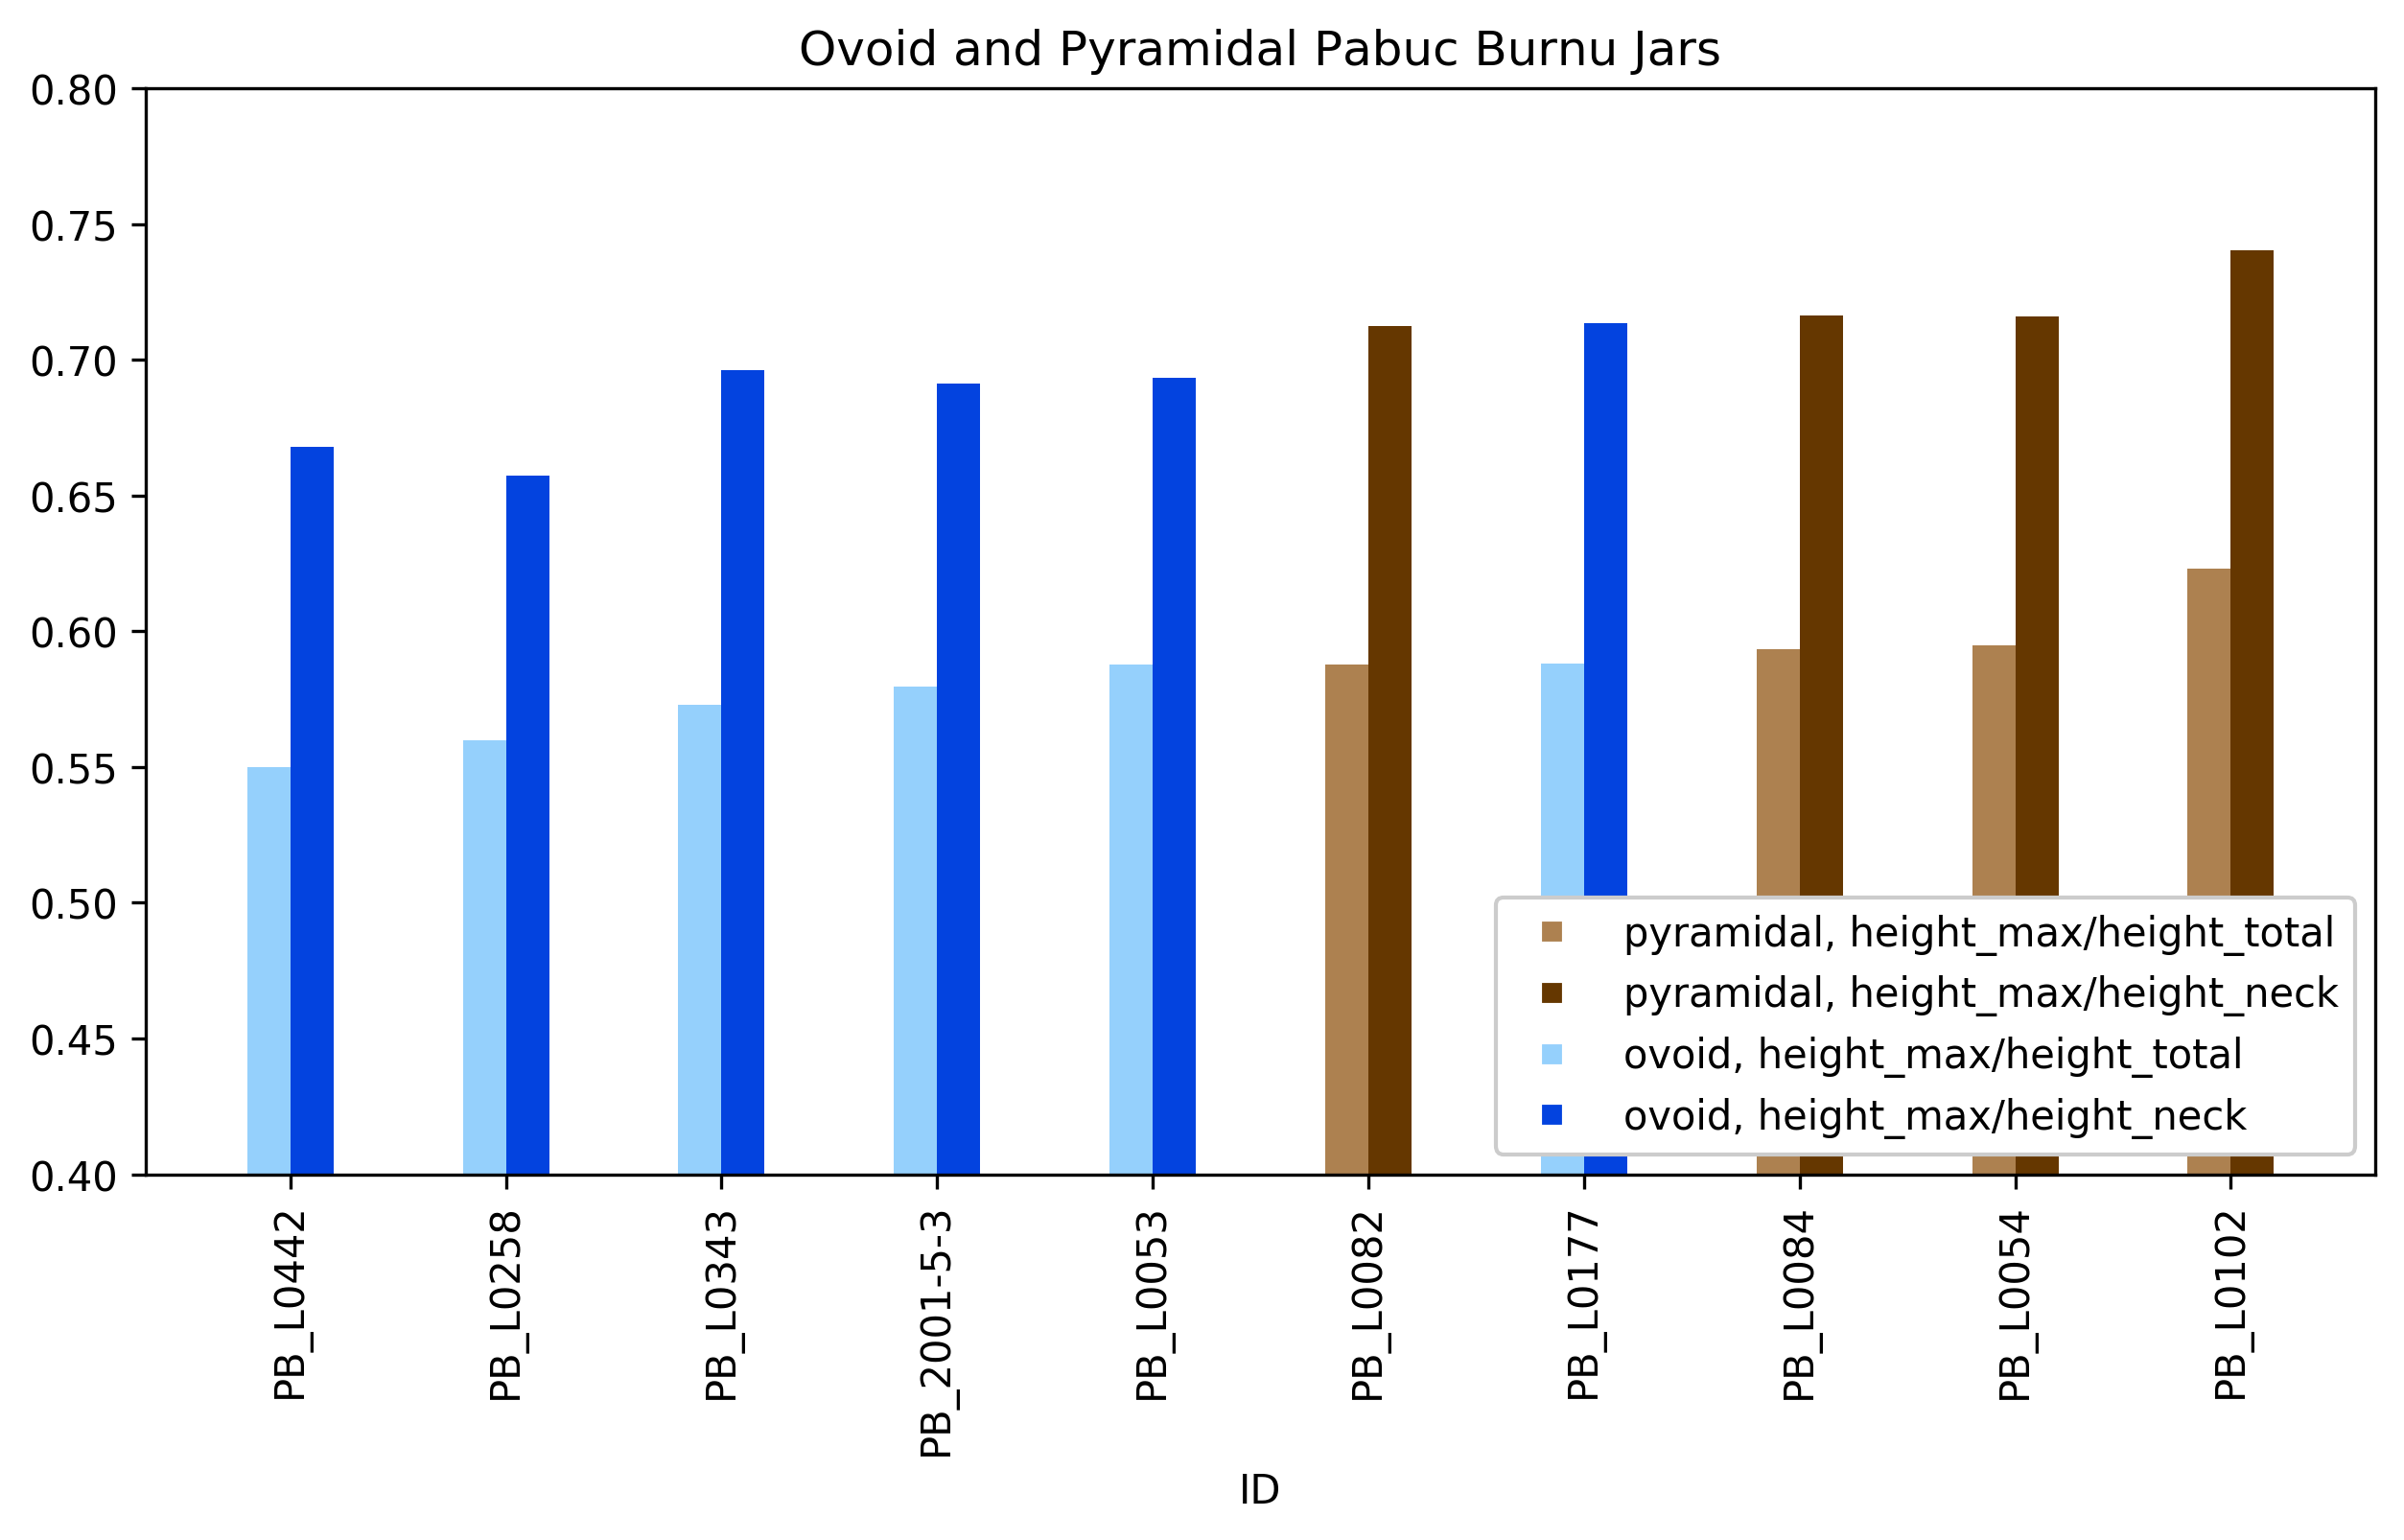

In [5]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)

w = 0.2
s = 0.2
fs_tick = 20

pyr_x_pos = list(df_pyr.position)
ovo_x_pos = list(df_ovo.position)

pyr_total_color = 'xkcd:light brown'
pyr_neck_color = 'xkcd:brown'
ovo_total_color = 'xkcd:light blue'
ovo_neck_color = 'xkcd:blue'

ax.bar([x-0.5*s for x in pyr_x_pos], df_pyr['height_max/height_total'], width=w,color=pyr_total_color, align='center')
ax.bar([x+0.5*s for x in pyr_x_pos], df_pyr['height_max/height_neck'], width=w,color=pyr_neck_color, align='center')
ax.bar([x-0.5*s for x in ovo_x_pos], df_ovo['height_max/height_total'], width=w,color=ovo_total_color, align='center')
ax.bar([x+0.5*s for x in ovo_x_pos], df_ovo['height_max/height_neck'], width=w,color=ovo_neck_color, align='center')


handle_list = [Line2D([0],[0], marker='s', color='w', markerfacecolor=pyr_total_color, label='pyramidal, height_max/height_total'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=pyr_neck_color, label='pyramidal, height_max/height_neck'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=ovo_total_color, label='ovoid, height_max/height_total'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=ovo_neck_color, label='ovoid, height_max/height_neck')]

plt.legend(handles=handle_list, loc='lower right', framealpha=1)
plt.xlabel('ID')

ax.set_xticks(df.position)
ax.set_xticklabels([x[:-8] for x in df['name']])
ax.set_title('Ovoid and Pyramidal Pabuc Burnu Jars')

plt.ylim(0.4, 0.8)
plt.xticks(rotation='vertical')
plt.show()